# Demo of coordinate gradient for the Lasso

Author : Alexandre Gramfort, INRIA

In [1]:
%matplotlib inline
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

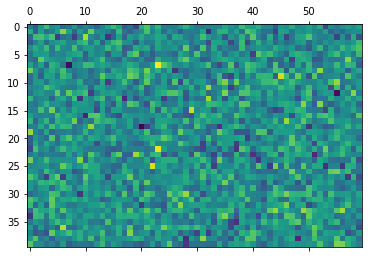

In [2]:
n, p = 40, 60
A = np.random.randn(n, p)
plt.matshow(A);

Generate some data:

In [3]:
x0 = np.zeros(p)
x0[10] = 30
x0[44] = -20
b = np.dot(A, x0)

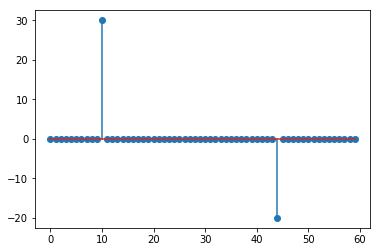

In [4]:
plt.stem(x0);

In [5]:
def fsign(f):
    """Sign function"""
    if f == 0:
        return 0
    elif f > 0:
        return 1.0
    else:
        return -1.0

In [10]:
def lasso_coordinate_descent(A, b, lambd, max_iter=200):
    n, p = A.shape
    norm_cols_A = (A ** 2).sum(axis=0)
    x = np.zeros(p)
    all_pobj = []

    for n_iter in range(max_iter * p):
        ii = n_iter % p
        # Get current residual
        R = b - np.dot(A, x)
        tmp = x[ii] + np.dot(A[:, ii], R) / norm_cols_A[ii]
        # Soft thresholding
        x[ii] = fsign(tmp) * max(abs(tmp) - lambd / norm_cols_A[ii], 0)
        pobj = 0.5 * linalg.norm(b - np.dot(A, x))**2 + lambd * np.sum(np.abs(x))
        if ii == 0:
            all_pobj.append(pobj)
    return x, all_pobj

Now run the iteration of the proximal coordinate gradient method:

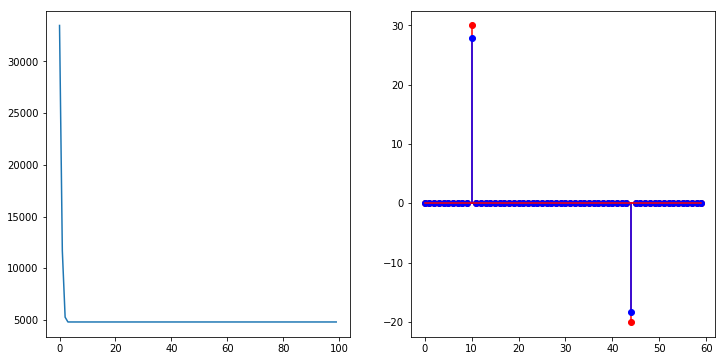

In [12]:
lambd = 100.
max_iter = 100
x, all_pobj = lasso_coordinate_descent(A, b, lambd, max_iter)

f , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.plot(all_pobj);
ax2.stem(x0, linefmt='r-', markerfmt='ro', basefmt='r-');
ax2.stem(x, linefmt='b-', markerfmt='bo', basefmt='r-');